# Supervised Learning: Regression

Regression-based machine learning is a predictive form of modeling in which the goal is to model the relationship between a target and predictor variable(s) in order to estimate a continuous set of possible outcomes. It is the most widely used machine learning model in finance.

One of the areas of focus for analysts in financial institutions (and finance in general) is predicting investment opportunities, typically by predicting asset prices and returns. Regression-based machine learning models are inherently well-suited in this context. They help financial and investment managers understand the properties of the predicted variable and its relationship to other variables, and also help them identify significant factors that drive asset returns. This helps investors estimate return profiles, trading costs, technical and financial infrastructure investments required, and consequently the risk profile and profitability of a strategy or portfolio.

With the availability of large amounts of data and processing techniques, regression-based machine learning is not limited to asset price prediction. These models are applied to a wide range of areas within finance, including portfolio management, insurance and instrument pricing, hedging, and risk management.

We will cover three areas of finance with the case studies, namely asset price prediction, instrument pricing, and portfolio management. All the case studies follow the seven-step process development model presented above; these steps include:
1. defining the problem;
2. loading the data;
3. performing exploratory analysis;
4. data preparation;
5. model evaluation;
6. feature engineering;
7. model tuning.

A substantial number of asset modeling and prediction problems in the financial industry involve a time component and the estimation of a continuous output. As such, it is also important to address *time series models*. In its broadest form, time series analysis is about inferring what happened to a series of data points in the past and trying to predict what will happen to them in the future. There has been much comparison and debate in academia and industry regarding the differences between supervised regression and time series models. Most time series models are *parametric* (i.e., a known function is assumed to represent the data), while most supervised regression models are *nonparametric*. Time series models primarily use historical data for the predicted variables for prediction, and supervised learning algorithms use *exogenous variables* as predictor variables. However, supervised regression can incorporate historical data of the predicted variable through a time delay approach, and a time series model (such as ARIMAX) can use exogenous variables for prediction. Thus, time series and supervised regression models are similar in that they can both use exogenous variables as well as historical data of the predicted variable to make predictions. Regarding the final output, both estimate a continuous set of possible outputs of a variable.

Since time series models are more closely aligned with supervised regression than with supervised classification, we will cover the concepts of time series models here, but separately. We will also demonstrate how we can use time series models with financial data to predict future values. Additionally, some deep learning models (such as LSTM) can be used directly for time series forecasting.

In “Case Study 1: Stock Price Prediction,” we will demonstrate one of the most common forecasting problems in finance: predicting stock returns. In addition to accurately predicting future stock prices, the purpose of this case study is to examine a machine learning-based framework for predicting a general asset class in finance. In it, we will explore several machine learning and time series concepts, and also focus on visualization and model tuning.

In “Case Study 2: Derivatives Pricing,” we will dive into derivatives pricing using supervised regression and show how machine learning techniques can be applied to traditional quantitative analysis problems. When compared to traditional derivatives pricing models, machine learning techniques can lead to faster pricing without relying on a lot of useless assumptions. Efficient numerical computation using machine learning could be increasingly useful in areas such as financial risk management, where a trade-off between efficiency and accuracy is often unavoidable.

In "Case Study 3: Investor Risk Tolerance and Robo Advisors", we will illustrate the supervised regression-based framework for estimating investor risk tolerance. In the case study, we will develop a robo advisor dashboard in Python and implement the risk tolerance prediction model in the dashboard. We will demonstrate how such models can lead to the automation of portfolio management processes, including the use of robo advisors for investment management. The purpose is to illustrate how machine learning can effectively be used to overcome the problem of traditional risk tolerance or risk tolerance questionnaires that suffer from several behavioral biases.

In "Case Study 4: Forward Curve Forecasting", we will use a supervised regression-based framework to forecast the terms of the forward curves simultaneously. We will demonstrate how we can produce different terms at the same time to model the yield curve using machine learning models.

---

What we will do next

- applying and comparing different time series and machine learning models;
- interpreting the models and results. Understanding the potential for overfitting and underfitting and the intuition behind linear versus nonlinear models;
- preparing and transforming data to be used in machine learning models;
- selecting and engineering features to improve model performance;
- using data visualization and exploration to understand the outputs;
- tuning algorithms to improve model performance. Understanding, implementing, and tuning time series models, such as ARIMA, for forecasting;
- structuring a problem statement related to portfolio management and behavioral finance in a regression-based machine learning framework;
- understanding how deep learning-based models, such as LSTM, can be used for time series forecasting.

---

## Time Series Models

A *time series* is a sequence of numbers that are ordered by a time index. Let's look at the following aspects of time series models, which we will delve into later in the case studies:

- the components of a time series;
- the autocorrelation and stationarity of time series;
- traditional time series models (such as ARIMA);
- the use of deep learning models for time series modeling;
- the conversion of time series data into a supervised learning framework.

### The Parts of a Time Series

A time series can be divided into the following components:

*Trend Component*
- a trend is a consistent directional movement in a time series. These trends will either be *deterministic* or *stochastic*. The former allows us to provide an underlying rationale for the trend, while the latter is a random feature of a series that we are unlikely to be able to explain. Trends commonly appear in financial series, and many trend models use sophisticated trend-identification algorithms.

*Seasonal Component*
- Many time series contain seasonal variation. This is especially true for time series that represent business sales or weather levels. In quantitative finance, we often see seasonal variation, especially in series related to the holiday season or annual temperature variation (such as natural gas).

We can write the components of a time series $y_t$ as:

$y_t = S_t + T_t + R_t$

where $S_t$ is the seasonal component, $T_t$ is the trend component, and $R_t$ represents the remaining component of the time series that was not captured by the other two components.

##### Implementation

```Python
import statsmodels.api as sm
sm.tsa.seasonal_decompose(y, freq = 52).plot()
```

### Autocorrelation and Stationarity

When we are given one or more time series, it is relatively straightforward to decompose them into trend, seasonality, and residual components. However, there are other aspects that come into play when working with time series data, especially in finance.

#### Autocorrelation

There are several situations in which consecutive elements of a time series exhibit correlation. That is, the behavior of sequential points in the series affects one another in a dependent manner. *Autocorrelation* is the similarity between observations as a function of the interval between them. Such relationships can be modeled using an autoregression model. The term *autoregression* indicates that it is a regression of the variable itself.

In the autoregression model, we predict the variable of interest using a linear combination of past values ​​of the variable.

Thus, an autoregressive model of order *p* can be written as:

$y_t = c + \phi_1 y_t-1 + \phi_2 y_t-2 + ... + \phi_p y_{t-p} + \epsilon$

where $\epsilon_t$ is noise. An autoregressive model is like a multiple regression, but with values ​​with intervals of $y_t$ as predictors. We refer to this as the AR*(p)* model, an autoregressive model of order *p*. Autoregressive models are extremely flexible in handling a wide range of different time series patterns.

#### Stationarity

A time series is considered stationary if its statistical properties do not change over time. Therefore, a time series with a trend or seasonality is not stationary, since they will affect the value of the series at different times. On the other hand, a noise series is stationary, since it does not matter when you observe it, as it will be similar at any time.

The figure below shows some examples of stationary and non-stationary series.

<figure>
    <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--pJUAANRS--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://miro.medium.com/max/1147/1%2Am0E2_nOE1oFhMc1L01oKsg.png" width="600">
    <figcaption>Stationary and Non-stationary graphs</figcaption>
</figure>

In the second graph, we can clearly see that the mean is changing (increasing) over time, resulting in an upward trend. Thus, it is a non-stationary series. For a series to be classified as stationary, it should not exhibit a trend. Moving on to the third graph, we certainly do not see a trend in the series; its variance is a function of time. A stationary series should have constant variance; therefore, this series is also non-stationary. In the last graph, the distribution gets closer as time increases, suggesting that the covariance is a function of time. 

Looking at the first graph, the mean, variance, and covariance are constant over time. This is what a stationary time series looks like. Predicting future values using this graph would be easier. Most statistical models require the series to be stationary in order to make effective and accurate predictions.

The two main reasons behind the non-stationarity of a time series are trend and seasonality. To use time series forecasting models, we typically convert any non-stationary series to stationary, which makes modeling easier since the statistical properties do not change over time.

#### Differentiation

Differentiation is one of the methods used to transform a time series into a stationary series. In this method, we compute the difference of consecutive terms in the series. Differentiation is typically performed to get rid of the varying mean. Mathematically, it can be expressed as:

$y_t = y_t - y_{t-1}$

where $y_t$ is the value at time *t*.

When the differenced series is noise, the original series is referred to as a non-stationary series of degree one.

### Traditional Time Series Models

There are many ways to model a time series for forecasting. Most time series models aim to incorporate the trend, seasonality, and remainder components, while also addressing the autocorrelation and stationarity embedded in the time series. For example, the autoregressive (AR) model discussed earlier addresses autocorrelation in a time series.

One of the most widely used models in time series forecasting is the ARIMA model.

#### ARIMA

If we combine stationarity with autoregression and a moving average model, we will obtain an *ARIMA* model, which is an acronym for AutoRegressive Integrated Moving Average, and has the following components:

*AR(p)*
- represents autoregression, that is, the regression of the time series on itself, as we saw earlier, with an assumption that the current values of the series depend on their previous values with some interval (or several). The maximum interval in the model is referred to as *p*.

*I(d)*
- represents the order of integration. It is simply the number of differences needed to transform the series into stationary.

*MA(q)*
- represents the moving average Without going into details, it models the error of the time series; again, the assumption is that the current error depends on the previous one with some interval, which is referred to as *q*.

The moving average equation is expressed as:

$y_t = c + \epsilon_t + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon{t-2}$

where $\epsilon_t$ is noise. We refer to this as an *MA(q)* model of order *q*. Combining all the components, the full ARIMA model can be expressed as:

$y_t = c + \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q} + \epsilon_t$

where $y_t$ is the differenced series (it may have been differenced more than once). The predictors on the right-hand side include both the interval values ​​of $y_t$ and the interval errors. We call this an ARIMA *(p, d, q)* model, where *p* is the order of the autoregressive part, *d* is the degree of the first differencing involved, and *q* is the order of the moving average part. The same stationarity and invertibility conditions used for autoregressive and moving average models also apply to the ARIMA model.

##### Implementation

```Python
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(endog = y_train, order = [1, 0, 0])
```

The ARIMA family of models has several variants, and some of them are as follows:

*ARIMAX*
- ARIMA models with exogenous variables included. We will use this model in case study 1.

*SARIMA*
- the "S" here stands for seasonality, and this model aims to model the seasonality component embedded in the time series, along with other components.

*VARMA*
- is the extension of the model to the multivariate case, where there are many variables to be predicted simultaneously. We do this in case study 4.

### Deep Learning Approach to Time Series Modeling

Traditional time series models, such as ARIMA, are well understood and effective for many problems. However, these traditional methods also suffer from several limitations. Traditional time series models are linear functions, or simple transformations of linear functions, and require manually diagnosed parameters, such as time dependence, and do not perform well with corrupted or missing data.

If we look at the advances in the field of deep learning for time series forecasting, we can see that *recurrent neural networks* (RNN) are gaining more and more attention. These methods can identify structures and patterns such as nonlinearity, can perfectly model problems with multiple input variables, and are relatively robust to missing data. RNN models can retain the state from one iteration to the next while using their own output as input for the next step. These deep learning models can be referred to as time series models as they can make future predictions using past data points, similar to traditional time series models like ARIMA. Therefore, there is a wide range of applications in finance where these deep learning models can be leveraged. Let’s take a look at deep learning models for time series forecasting.

#### RNNs

Recurrent neural networks (RNNs) are called "recurrent" because they perform the same task for each element of a sequence, with the output dependent on previous computations. RNN models have a memory, which captures information about what has already been computed. A recurrent neural network can be thought of as multiple copies of the same network, with each phase passing a message to the next.

#### Long Short-Term Memory (LSTM)

Long short-term memory (LSTM) is a special type of RNN explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is almost the default behavior of an LSTM model. These models are composed of a set of cells with features to memorize the sequence of data. The cells capture and store the data streams. In addition, they interconnect a module from the past with another from the present to transmit information from multiple instances of the past to the present. Due to the use of gates in each cell, the data in each of them can be eliminated, filtered or added to the following cells.

*Gates*, based on the layers of the artificial neural network, allow cells to optionally let data through or be discarded. Each layer outputs numbers between zero and one, representing how much of each data segment should be allowed through each cell. More precisely, an estimate of zero implies “let nothing through.” An estimate of one indicates “let everything through.” Three types of gates are involved in each LSTM, each intended to control the state of each cell:

*Forget Gate*
- outputs a number between zero and one, where “keep this completely” and zero implies “ignore this completely.” This gate conditionally decides whether the past should be forgotten or preserved.

*Input Gate*
- chooses what new data should be stored in the cell.

*Output Gate*
- decides what will be output by each cell. The output value will be based on the state of the cell along with the filtered and newly filtered and newly added data.

Keras wraps the libraries and functions for efficient numerical computation and allows us to define and train LSTM neural network models with just a few lines of code. In the following code, the LSTM module from *keras.layers* is used to implement the LSTM network. The network is trained with the *X_train_LSTM* variable. The network has one hidden layer with fifty LSTM blocks or neurons and one output layer that predicts a single value.

##### Implementation

```Python
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
def create_LSTMmodel(learn_rate - 0.01, momentum = 0):
    # create model
    model = Sequential()
    model.add(LSTM(50, input_shape = (X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    # A greater number of cells can be added if necessary
    model.add(Dense(1))
    optimizer = SGD(lr = learn_rate, momentum = momentum)
    model.compile(loss = 'msVe', optimizer = 'adam')
    
    return model

LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum = 0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, y_train_LSTM, validation_date = (X_test_LSTM, y_test_LSTM), 
epochs = 330, batch_size = 72, verbose = 0, shuffle = False)
```

In terms of learning and implementation, LSTM provides considerably more options for fine-tuning when compared to ARIMA models. Although deep learning models exhibit several advantages over traditional time series models, deep learning models are more complicated and difficult to train.

### Modifying Time Series Data for Supervised Learning Models

A time series is a sequence of numbers that are ordered by a time index. In supervised learning, we have input variables (*X*) and an output variable (*y*). Given a sequence of numbers for a time series data set, we can restructure the data into a set of predictor and predicted variables, just like in a supervised learning problem. We can do this by using the previous time steps as the input variables and using the next time step as the output variable. Let's look at an example.

We can restructure the time series shown on the left in the table as a supervised learning problem by using the value from the previous time step to predict the value at the next time step. Once we reorganize the time series data set in this way, the data will look like the table on the right.

| Time step | Value | *** |  X  |  y  |
| :-------: | :---: | :-: | :-: | :-: |
|     1     |  10   | --- | ?   | 10  |
|     2     |  11   | --- | 10  | 11  |
|     3     |  18   | --- | 11  | 18  |
|     4     |  15   | --- | 18  | 15  |
|     5     |  20   | --- | 15  | 20  |
|           |       | --- | 20  | ?   |

We can see that the previous time step is the input (*X*) and the next time step is the output (*y*) in our supervised learning problem. The order between these two observations is preserved and should remain so when using this dataset to train a supervised model. We will delete the first and last rows while training our supervised model, since we do not have the values of *X* or *y*. 

In Python, the main function to help transform time series data into a supervised learning problem is the Pandas *shift()* function. We will demonstrate this approach in the case studies. Using previous time steps to predict the next time step is called the sliding window, time delay, or lag method.

## Case Study 1: Stock Price Prediction

One of the biggest challenges in finance is predicting stock prices. However, with recent advances in machine learning applications, the field is evolving to use non-deterministic solutions that learn from what is happening in order to make more accurate predictions. Machine learning techniques are a natural fit for predicting stock prices based on historical data. Predictions can be made for a single point in time or for a set of points in time.

As a high-level overview, in addition to the historical stock price itself, commonly useful features for stock price prediction include:

*Correlated assets*
- an organization depends on and interacts with many external factors, including competitors, customers, the global economy, geopolitical situation, fiscal and monetary policies, access to capital, and so on. In this way, its share price may be correlated not only with the share price of other companies, but also with other assets such as commodities, forex, broad-based indices or even fixed income securities.

*Technical indicators*
- Many investors follow technical indicators. Moving average, exponential moving average, and momentum are the most popular.

*Fundamental analysis*
- Two basic sources of features that can be used in fundamental analysis include:
- Performance report
- Companies' annual and quarterly reports can be used to extract or determine key metrics such as ROE (return on equity) or P/E (price-to-earnings);
- News
- News can indicate future events that have the potential to move the stock price in a certain direction;

In this case study, we will use several supervised learning-based models to predict the stock price of Microsoft using correlated assets and its own historical data. By the end of the study, we will be familiar with a general machine learning approach to stock price prediction modeling, from collecting and cleaning the data to developing and tuning different models.

---
In this case study, we will focus on:

- analyzing several machine learning and time series models, varying in complexity, that can be used to predict the returns of a stock;

- visualizing the data using different types of graphs (density, correlation, scatter plot, ...);

- using deep learning models (LSTM) for time series forecasting;

- implementing grid search for time series models (ARIMA model);

- interpreting the results and examining the potential overfitting and underfitting of the data across all models.

---

## Blueprint of Supervised Learning Models to Predict Stock Price

**1. Problem Definition**

In the supervised regression framework used for this case study, the weekly return of Microsoft stock is the predicted variable. We need to understand what affects the company's stock price and incorporate as much information as possible into the model. Considering correlated assets, technical indicators, and fundamental analysis, our focus will be on correlated assets as features.

For this case study, in addition to Microsoft's historical data, the independent variables used are the following possible correlated assets:

*Stocks*
- IBM (IBM) and Alphabet (GOOGL)

*Currency*
- USD/JPY and GBP/USD

*Indices*
- S&P 500, Dow Jones, and VIX

The dataset used for this study is extracted from Yahoo Finance and the FRED website (https://fred.stlouisfed.org). In addition to accurately predicting stock prices, this case study will also demonstrate the infrastructure and framework for each step of the time series modeling and supervised regression modeling for stock price prediction. We will use the daily close of the last ten years, starting from 2010.

<br>

**2. Loading the data and packages**

**2.1. Loading the packages** 

The list of libraries used for data loading, analysis and preparation, model evaluation and tuning is shown below. Packages used for different purposes have been segregated in the code.

**2.2 Loading data**

One of the most important steps in machine learning and predictive modeling is collecting good data. The following steps demonstrate loading data from Yahoo Finance and FRED websites using the Pandas DataReader function.

```Python
stk_tickers = ['MSFT', 'UBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DIJA', 'VIXCLS']
    
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
```

Next, we define our dependent (*y*) and independent (*X*) variables. The predicted variable is the weekly return of Microsoft stock (MSFT). We assume that the number of trading days per week is five, and we compute the return using this parameter. For the independent variables, we use the correlated assets and the historical return of MSFT with different frequencies. 

The variables used as independent variables are the five-day lagged returns of stocks (IBM, GOOGL), currencies (USD/JPY and GBP/USD), and indices (S&P 500, Dow Jones, VIX), along with the 5-, 15-, 30-, and 60-day lagged returns of MSFT. 

The five-day lagged variables incorporate the time series component using a time-delay approach, where the lagged variable is included as one of the independent variables. This step is to restructure the time series data into a supervised regression-based modeling framework.

```Python
return_period = 5
y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
y.name = y.name[-1] + '_pred'

X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'AAPL'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12]], axis = 1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1, X2, X3, X4], axis = 1)

dataset = pd.concat([y, X], axis = 1).dropna().iloc[::return_period, :]
y = dataset.loc[:, y.name]
X = dataset.loc[:, X.columns]
```

<br>

**3. Exploratory data analysis**

We will look at descriptive statistics, data visualization and time series analysis.

**3.1. Descriptive statistics**

We will look at the data set we have from simple methods.

```Python
dataset.head()
```

The variable MSFT_pred is the return of Microsoft stock and is also the predicted variable. The dataset contains the lagged series of other correlated stocks, currencies, and indices. In addition, it also consists of historical and lagged returns of MSFT.

**3.2. Data Visualization**

The quickest way to learn more about data is to visualize it. Visualization involves understanding each attribute of the data set independently. We will look at the scatterplot and the correlation matrix. These graphs give us a sense of the interdependence of the data. Correlation can be calculated and demonstrated for each pair of variables by creating a correlation matrix. This way, in addition to the relationship between the independent and dependent variables, it also shows the correlation between the independent variables. This is useful to know because some machine learning algorithms, such as linear and logistic regression, can perform poorly if there are highly correlated input variables in the data:

```Python
correlation = dataset.corr()
pyplot.figure(figsize = (15, 15))
pyplot.title("Correlation Matrix")
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = "cubehelix")
```

Looking at the correlation plot, we see some correlation between the predicted variable and the 5-, 10-, 15-, 30-, and 60-day lagged returns of MSFT. In addition, we can see a greater negative correlation between the returns of many assets and the VIX, which is intuitive.

We can now visualize the relationship between all the variables in the regression using the scatter plot, shown below:

```Python
pyplot.figure(figsize = (15, 15))
scatter_matrix(dataset, figsize = (12, 12))
pyplot.show()
```

Looking at the correlation graph, we see some linear relationship of the predicted variable with 15, 30, and 60 day lagged returns of MSFT. On the other hand, we do not see any special relationship between our predicted variable and the features.

**3.3. Time Series Analysis**

Next, we dive into time series analysis and look at the decomposition of the time series of the forecasted variable into trend and seasonal components.

```Python
res = sm.tsa.seasonal_deocmpose(y, freq = 52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(8)
pyplot.show()
```

We can see that for MSFT , there was an overall upward trend in the return series. This could be due to the large increase in the stock price over the past few years, causing more positive data points than negative ones in the weekly return. The trend could show up in the constant/biased terms of our models. The residual (or noise) term is relatively small across the entire time series.

<br>

**4. Data Preparation**

This step typically involves data processing, data cleaning, feature importance assessment, and feature performance reduction. The data obtained for this case study is relatively clean and does not require further processing. Feature reduction may be useful here, but given the relatively small number of variables considered, we will keep everything as is.

<br>

**5. Model Evaluation**

**5.1. Train-test split and evaluation metrics**

Como descrevemos anteriormente, é uma boa ideia repartir o conjunto de dados originais em *conjunto de treinamento* e *conjunto de teste*. O conjunto de teste

In [1]:
# Installing libs
#!pip install scikeras
#!pip install pandas_datareader
#!pip install tensorflow
#!pip uninstall keras -y
#!pip install yfinance

In [31]:
# Data preparation and visualization
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# Supervised regression models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [4]:
# Data analysis and model evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [5]:
# Time series models
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [6]:
'''
# Deep learning models
from keras.optimizers import SGD
from keras.layers import Dense, LSTM
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
'''

'\n# Deep learning models\nfrom keras.optimizers import SGD\nfrom keras.layers import Dense, LSTM\nfrom scikeras.wrappers import KerasRegressor\nfrom tensorflow.keras.models import Sequential\n'

In [7]:
stk_tickers = ['AAPL', 'MSFT', 'GOOGL']
ccy_tickers = ['DEXUSAL', 'DEXCAUS']
idx_tickers = ['^GSPC', '^DJI', '^VIX']

# Download stock data
stk_data = yf.download(stk_tickers, start="2013-01-01", end="2024-01-01")
print(stk_data.head())

# Download index data
idx_data = yf.download(idx_tickers, start="2013-01-01", end="2024-01-01")
print(idx_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker           AAPL      GOOGL       MSFT       AAPL      GOOGL       MSFT   
Date                                                                           
2013-01-02  16.669012  18.013227  22.362123  16.850267  18.106626  22.451182   
2013-01-03  16.458611  18.023687  22.062555  16.688442  18.229411  22.386409   
2013-01-04  16.000162  18.379845  21.649649  16.353259  18.467015  22.135430   
2013-01-07  15.906049  18.299646  21.609161  16.069996  18.414961  21.762991   
2013-01-08  15.948858  18.263535  21.495806  16.148633  18.338252  21.690119   

Price             Low                             Open                        \
Ticker           AAPL      GOOGL       MSFT       AAPL      GOOGL       MSFT   
Date                                                                           
2013-01-02  16.444343  17.846360  21.981594  16.814441  17.917839  22.062558   
2013-01-03  16.425214  17.950215  21.98

[*********************100%***********************]  3 of 3 completed

Price              Close                              High               \
Ticker              ^DJI        ^GSPC   ^VIX          ^DJI        ^GSPC   
Date                                                                      
2013-01-02  13412.549805  1462.420044  14.68  13412.709961  1462.430054   
2013-01-03  13391.360352  1459.369995  14.56  13430.599609  1465.469971   
2013-01-04  13435.209961  1466.469971  13.83  13447.110352  1467.939941   
2013-01-07  13384.290039  1461.890015  13.79  13436.129883  1466.469971   
2013-01-08  13328.849609  1457.150024  13.62  13377.419922  1461.890015   

Price                       Low                              Open  \
Ticker       ^VIX          ^DJI        ^GSPC   ^VIX          ^DJI   
Date                                                                
2013-01-02  15.93  13104.299805  1426.189941  14.60  13104.299805   
2013-01-03  14.92  13358.299805  1455.530029  14.24  13413.009766   
2013-01-04  14.31  13376.230469  1458.989990  13.64  1

In [8]:
ccy_tickers = ['DEXUSAL', 'DEXCAUS']  # Example tickers from FRED
ccy_data = web.DataReader(ccy_tickers, 'fred', start='2013-01-01', end='2024-01-01')
print(ccy_data.head())

            DEXUSAL  DEXCAUS
DATE                        
2013-01-01      NaN      NaN
2013-01-02   1.0492   0.9859
2013-01-03   1.0515   0.9853
2013-01-04   1.0454   0.9856
2013-01-07   1.0479   0.9859


In [20]:
# Replace zeros with NaN to avoid issues with log
stk_data = stk_data.replace(0, np.nan)
ccy_data = ccy_data.interpolate(method='time').ffill().bfill()
idx_data = idx_data.replace(0, np.nan)

# Define return period
return_period = 5

# Target (MSFT future return)
y = np.log(stk_data[('Close', 'MSFT')]).diff(return_period).shift(-return_period)
y.name = 'MSFT_pred'

# Features from other stocks
idx = pd.IndexSlice
X1 = np.log(stk_data.loc[:, idx['Close', ['GOOGL', 'AAPL']]]).diff(return_period)
X1.columns = X1.columns.droplevel(0)

# Features from currency data
X2 = np.log(ccy_data).diff(return_period)

# Features from indices
X3 = np.log(idx_data.loc[:, pd.IndexSlice['Close', :]]).diff(return_period)
X3.columns = X3.columns.droplevel(0)

# MSFT lagged features
X4 = pd.concat([
    np.log(stk_data[('Close', 'MSFT')]).diff(i)
    for i in [return_period, return_period * 3, return_period * 6, return_period * 12]
], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

# Combine features
X = pd.concat([X1, X2, X3, X4], axis=1)

# Merge features with target and clean dataset
dataset = pd.concat([y, X], axis=1).dropna().iloc[::return_period, :]
y = dataset[y.name]
X = dataset.drop(columns=y.name)

In [24]:
dataset.head()

,MSFT_pred,GOOGL,AAPL,DEXUSAL,DEXCAUS,^DJI,^GSPC,^VIX,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2013-04-01,-0.000699,-0.011319,-0.074123,-0.002970,-0.005004,0.004182,0.003386,0.000737,0.012663,0.021552,0.028370,0.043462
2013-04-08,0.003491,-0.033429,-0.006315,-0.003075,0.003241,0.002784,0.000576,-0.029139,-0.000699,0.019425,0.029461,0.076638
2013-04-15,0.071940,0.009096,-0.015035,0.000385,0.000882,-0.000978,-0.006875,0.269512,0.003491,0.015455,0.026131,0.067476
2013-04-22,0.056131,0.022984,-0.051763,-0.013367,0.005276,-0.002196,0.006511,-0.182437,0.071940,0.074731,0.096284,0.117831
2013-04-29,0.034361,0.023408,0.075930,0.009028,-0.012157,0.017123,0.019715,-0.048408,0.056131,0.131562,0.150987,0.180498


In [26]:
dataset.shape

(541, 12)

<Axes: title={'center': 'Correlation Matrix'}>

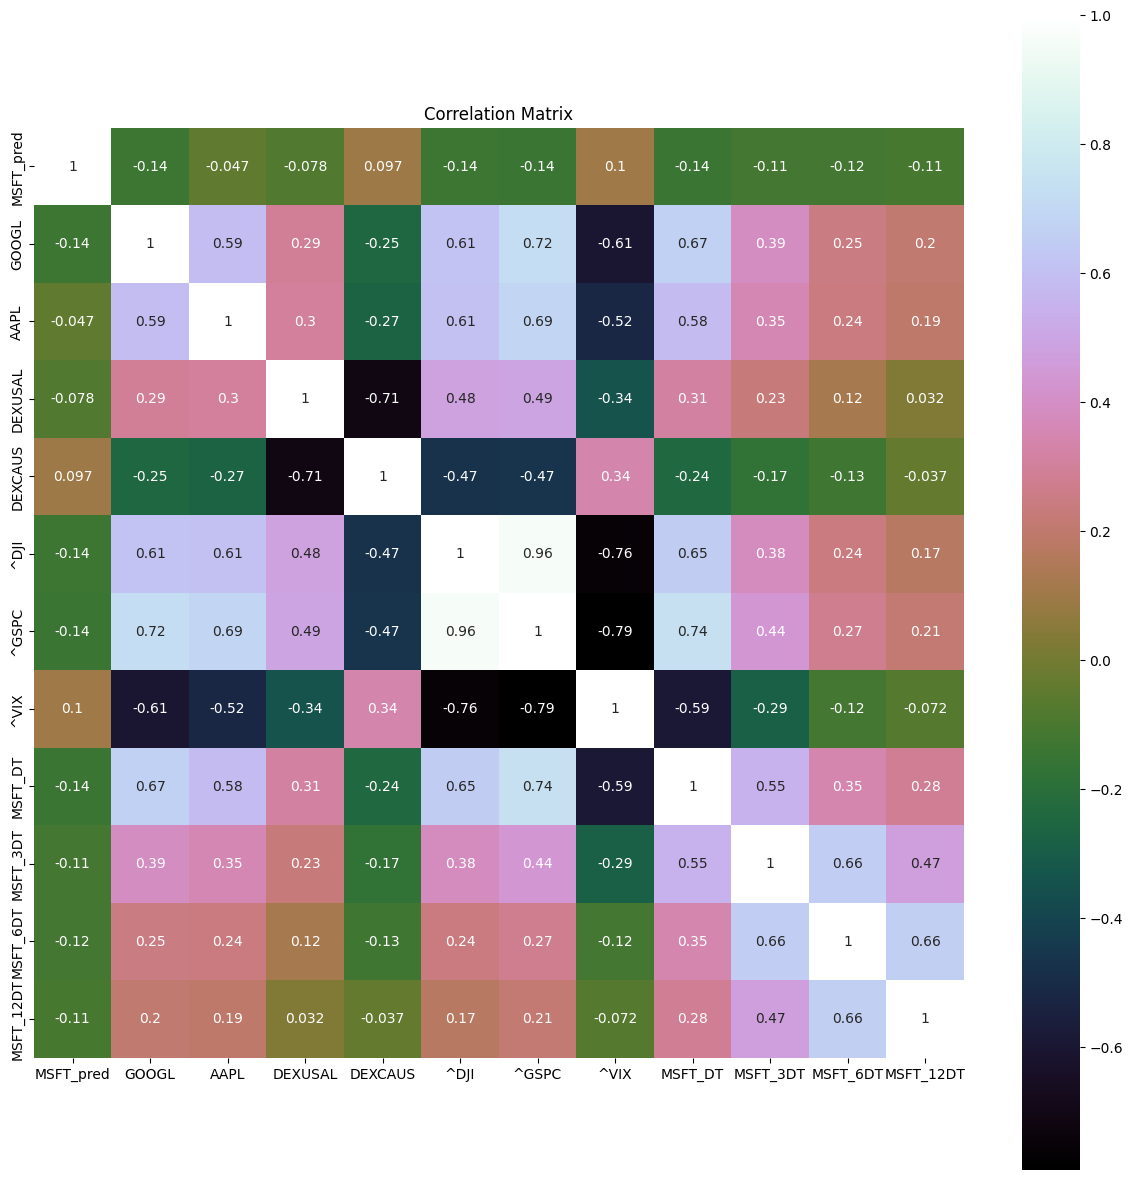

In [32]:
# Visualizing the data
correlation = dataset.corr()
plt.figure(figsize = (15, 15))
plt.title("Correlation Matrix")
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = "cubehelix")